## Obtener rutas

In [55]:
from glob import glob
import os
lista = glob("../data/*",)
lista = [os.path.basename(l) for l in lista]

decl = '{\n'
for indice, l in enumerate(lista):
    decl += '\t'
    decl += f'"{l}"'
    if indice != len(lista)-1:
        decl+=',\n'
decl += '\n}'
with open("lista.txt", 'w') as f:
    f.write(decl)

## Obtener metricas por cada experimento

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_true = pd.read_csv("../res/testing.csv", header=None).iloc[:,-24:].to_numpy()
y_true_arg = np.argmax(y_true, axis=1)

coincidencias = []

resultados = {
    'combinacion': [],
    'accuracy':[],
    'precision': [],
    'recall': [],
    'f1': []
}

orden_capa = lambda c, n, f: c[0]+f"^{{({c[1]})}}"+f'_{{{n},{f}}}'
def notacion_str(cad:str):
    seps = cad.split('_')
    notacion = ''
    for n_capa in range(0,len(seps)-1, 3):
        notacion += orden_capa(seps[n_capa], seps[n_capa+1], seps[n_capa+2])
    return f'${notacion}$'

for carpeta in lista:
    y_pred = pd.read_csv(f"../data/{carpeta}/{carpeta}.csv", header=None).to_numpy()
    y_pred_arg = np.argmax(y_pred, axis=1)

    resultados['combinacion'].append(notacion_str(carpeta))
    resultados['accuracy'].append(accuracy_score(y_true_arg, y_pred_arg))
    resultados['precision'].append(precision_score(y_true_arg, y_pred_arg, average='macro', zero_division=0))
    resultados['recall'].append(recall_score(y_true_arg, y_pred_arg, average='macro'))
    resultados['f1'].append(f1_score(y_true_arg, y_pred_arg, average='macro'))
    # porc = round(100*sum(np.equal(y_true_arg, y_pred_arg))/y_true_arg.size,2)
    # coincidencias.append(porc)
    # print(f'{carpeta}: {porc}%')


resultados = pd.DataFrame(resultados).sort_values(by=['accuracy','precision', 'recall', 'f1'], ascending=False).round(6)
resultados.to_csv("metricas.csv", index=False)
# plt.hist(coincidencias)

## Graficar perdidas de entrenamiento y validación

In [3]:
""" import seaborn as sns

sns.set_theme()


for carpeta in lista:
    perdidas = pd.read_csv(f'../data/{carpeta}/perdidas.csv', header=None)
    plt.plot(perdidas.index, perdidas[0], label='entrenamiento')
    plt.plot(perdidas.index, perdidas[1], label='validacion')
    plt.ylabel("Perdida")
    plt.xlabel("Epocas")
    plt.legend()
    plt.savefig(f'../config/graficas/{carpeta}')
    plt.clf() """

<Figure size 640x480 with 0 Axes>

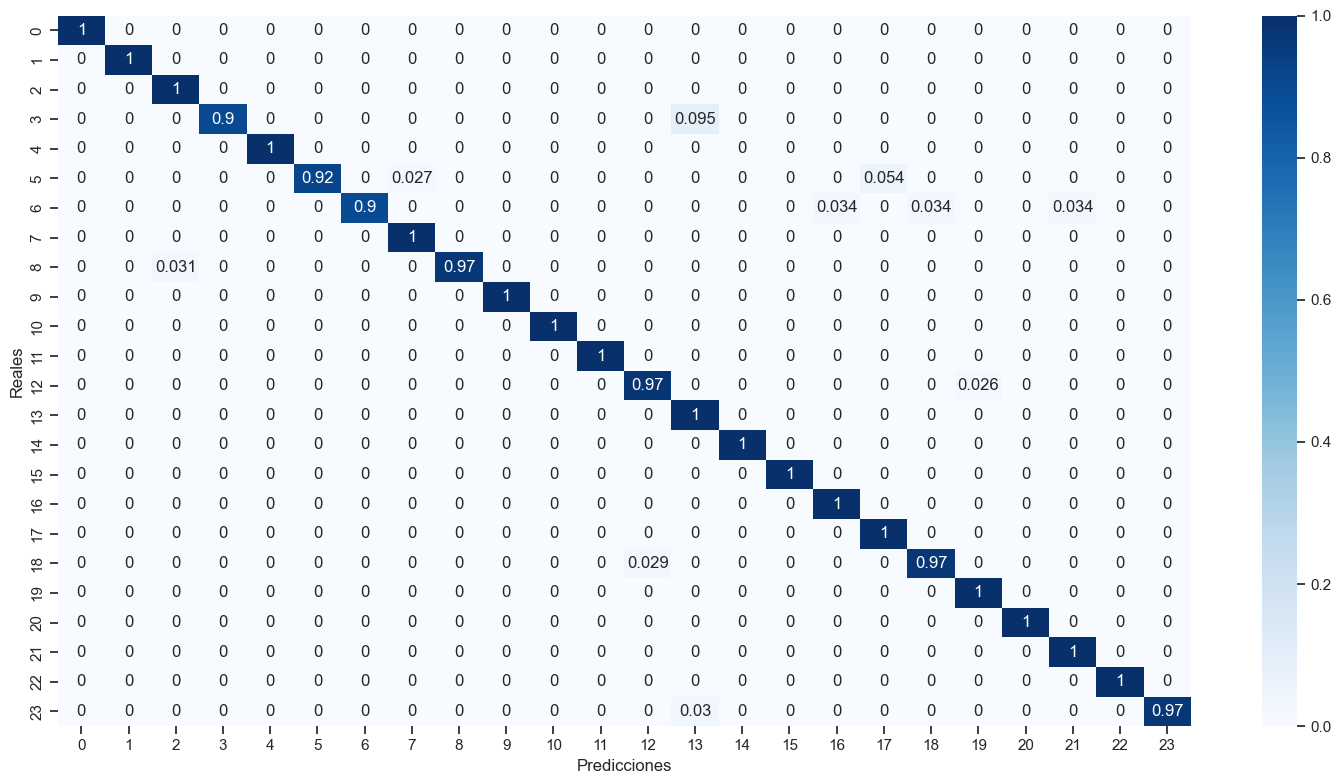

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_true = pd.read_csv("../res/testing.csv", header=None).iloc[:,-24:].to_numpy()
y_true_arg = np.argmax(y_true, axis=1)
y_pred_mejor = pd.read_csv(f"../data/C1_50_T/C1_50_T.csv", header=None).to_numpy()
y_pred_arg_mejor = np.argmax(y_pred_mejor, axis=1)
matriz_confusion = confusion_matrix(y_true_arg, y_pred_arg_mejor, normalize='true')
"""
# print(matriz_confusion)
plt.figure(figsize=(15,15))
ConfusionMatrixDisplay(matriz_confusion).plot()
plt.show() """
sns.set_style("ticks")

plt.figure(figsize=(15, 8))
sns.heatmap(matriz_confusion, annot=True, cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.tight_layout()
plt.savefig("matriz_confusion.png")